# Signal and Noise, Power and Energy, SNR, Eb/N0, Es/N0

Outline:

* Introduction to Signal Power and Noise Power
* Signal-to-Noise Ratio (SNR)
* SNR in dB
* Energy per Symbol to Noise Power Spectral Density Ratio (Es/N0)
* Energy per Bit to Noise Power Spectral Density Ratio (Eb/N0)
* Relationship Between SNR, Es/N0, Eb/N0 and Modulation
* BER Performance and Thresholds
* Noise Models and Channel Impairments
* Practical Applications
* Hands-on Exercises
* Summary and Closing Thoughts


## 1. Introduction to Signal Power and Noise Power

Definition of power: Average energy dissipated over a period of time: $P = E/t$

### 1.1. Signal Power

Signal Power: Average energy transmitted per unit time by a signal.

Let's interpret the definition in mathematical terms:

In a continious domain:
$$ P = \frac{1}{T} \int_{0}^{T} |s(t)|^2 dt $$
In a discrete domain:
$$ P = \frac{1}{N} \sum_{n=0}^{N-1} |s[n]|^2 $$


It represents the strength of the signal and determines how well it can be received and interpreted over a distance.

### 1.2. Noise Power

Noise Power: Total power of the all unwanted, random, distruptive signals in the system. 

Sources: Cosmic radiation, thermal noise, etc.

For example, take thermal noise (spoiler: thermal noise is an example for AWGN). It's power is calculated as:

$ N = kT \cdot B $, where:

* N: Noise power (thermal) (Watts)
* k: Boltzmann's constant (1.38 * 10^{-23} Joules/Kelvin)
* T: Temperature (Kelvin)
* B: Bandwidth (Hz, or 1/s)

The *Noise Power Spectral Density*, $N_0$, is calculated as: 

$N_0 = \frac{N}{B}$

The unit of noise power is in Watts. If *Noise Power Spectral Density*, $N_0$, then the unit is spectral density (W/Hz).



### 1.3 Calculating Total and Average Signal Power

Signal power is a critical concept in communications and signal processing. It quantifies the strength of a signal and is used to determine metrics such as Signal-to-Noise Ratio (SNR). This guide outlines the process for calculating the total and average signal power, specifically for modulation schemes like 16-QAM.

---

#### 1.3.1. Understanding Signal Power

Signal power (\(P_s\)) measures the energy contained in a signal over time or across a constellation. It is defined as:

\[
P_s = \frac{1}{N} \sum_{i=1}^N |s_i|^2,
\]

where:
- \(s_i\) represents the symbols in the signal constellation.
- \(N\) is the total number of symbols.
- \(|s_i|^2 = a_i^2 + b_i^2\), with \(a_i\) and \(b_i\) as the real and imaginary parts of \(s_i\).

---

#### 1.3.2. Power Components of Modulation Schemes

In complex modulation schemes (e.g., QAM), the total power is derived from the **orthogonal contributions** of the real and imaginary components.

##### Example: 16-QAM Constellation
The symbols in a 16-QAM constellation are typically drawn from:
\[
s_i \in \{-3, -1, +1, +3\} + j\{-3, -1, +1, +3\}.
\]

###### **Step 1: Compute the Power of the Real Part**
The squared values for the real part are:
\[
3^2, 1^2, 1^2, 3^2 = 9, 1, 1, 9.
\]
The average power of the real part is:
\[
P_{\text{real}} = \frac{9 + 1 + 1 + 9}{4} = 5.
\]

###### **Step 2: Compute the Power of the Imaginary Part**
The imaginary part has the same values as the real part, so:
\[
P_{\text{imag}} = 5.
\]

###### **Step 3: Compute the Total Power**
The total power is the sum of the orthogonal components:
\[
P_s = P_{\text{real}} + P_{\text{imag}} = 5 + 5 = 10.
\]

---

#### 1.3.3. Normalizing Signal Power

To normalize the signal so that the average power is \(P_s = 1\), each symbol is scaled by the square root of the total power:

\[
s_i^\text{norm} = \frac{s_i}{\sqrt{P_s}}.
\]

For 16-QAM, the scaling factor is:
\[
\sqrt{P_s} = \sqrt{10}.
\]

After normalization:
\[
P_s^\text{norm} = \frac{1}{N} \sum_{i=1}^N |s_i^\text{norm}|^2 = 1.
\]

---

#### 1.3.4. Python Implementation

Below is a Python implementation to calculate and normalize the signal power:

In [5]:
import numpy as np

def calculate_power(symbols):
    """Calculate the total power of a signal."""
    avg_power = np.mean(np.abs(symbols)**2)
    return avg_power

def normalize_symbols(symbols):
    """Normalize the symbols to have unit average power."""
    avg_power = calculate_power(symbols)
    return symbols / np.sqrt(avg_power)

# Example: 16-QAM symbols
qam_symbols = np.array([-3-3j, -3-1j, -3+1j, -3+3j,
                        -1-3j, -1-1j, -1+1j, -1+3j,
                         1-3j,  1-1j,  1+1j,  1+3j,
                         3-3j,  3-1j,  3+1j,  3+3j])

# Calculate power and normalize
total_power = calculate_power(qam_symbols)
normalized_symbols = normalize_symbols(qam_symbols)

print(f"Total Power: {total_power}")
print(f"Normalized Symbols:\n{normalized_symbols}")
print(f"Normalized Power: {calculate_power(normalized_symbols)}")


Total Power: 10.000000000000002
Normalized Symbols:
[-0.9486833 -0.9486833j  -0.9486833 -0.31622777j -0.9486833 +0.31622777j
 -0.9486833 +0.9486833j  -0.31622777-0.9486833j  -0.31622777-0.31622777j
 -0.31622777+0.31622777j -0.31622777+0.9486833j   0.31622777-0.9486833j
  0.31622777-0.31622777j  0.31622777+0.31622777j  0.31622777+0.9486833j
  0.9486833 -0.9486833j   0.9486833 -0.31622777j  0.9486833 +0.31622777j
  0.9486833 +0.9486833j ]
Normalized Power: 1.0


### Notes

#### Is the equation different for different types of noise?
Yes, the noise power equation varies depending on the type of noise. Some examples:
* Thermal Noise
* Shot Noise
* Quantization Noise
* Impulse Noise

#### Is there a generalized AWGN noise equation?
Yes, for Additive White Gaussian Noise (AWGN), the generalized noise power is given as: $N = N_0 \cdot B$

#### How AWGN Extends Beyond Thermal Noise
While thermal noise is an example of AWGN, not all AWGN is thermal noise. Other sources of AWGN include: Cosmic Background Radiation, Man-made Noise. These sources, like thermal noise, are often modeled as white and Gaussian for practical system analysis.

#### Key examples of AWGN in the context of wireless systems
* Thermal Noise: Caused by the random motion of electrons in electronic components (e.g., antennas, receivers, amplifiers).
* Receiver Noise: Noise generated by electronic circuits in the receiver, such as amplifiers, mixers, or filters.
* Atmospheric Noise: Random electromagnetic radiation from natural sources such as the sun, lightning, and cosmic radiation.

In addition:
* Interference Treated as AWGN: Aggregated interference from many uncoordinated transmitters (e.g., WiFi, cellular devices, Bluetooth, etc.).
* Multi-user Interference: Signals from other users sharing the same frequency or channel.


#### Why AWGN is Widely Used
* Theoretical Benchmark: AWGN is used as the baseline for assessing communication systems because it isolates noise from other channel impairments (e.g., fading, shadowing).
* Practical Approximation: Real-world noise sources often aggregate to exhibit additive, white, and Gaussian characteristics, making AWGN a reasonable assumption.

## 2. Signal-to-Noise Ratio (SNR)

Signal-to-Noise Ratio (SNR) is a measure of the quality of a signal relative to the background noise in a communication system. It is defined as the ratio of the signal power ($P_{signal}$) to the noise power ($P_{noise}$).

$$ SNR = \frac{P_{signal}}{P_{noise}}$$

* If SNR is less than 1, noise power is greater than signal power.
* If SNR is more than 1, signal power is greater than noise power.

### 2.1. SNR in dB

To express SNR on a logarithmic scale, it is converted to decibels (dB):

$$ SNR(dB) = 10 \cdot \log_{10}(\frac{P_{signal}}{P_{noise}})$$

* If SNR(dB) is negative, noise power is greater than signal power.
* If SNR(dB) is positive, signal power is greater than noise power.

Why use in dB form? 
* Easier to represent large ratios
* Numerically more stable
* In cascaded systems, power ratios can be summed in dB directly (What's cascaded systems?)
* Example: Amplifier gain in dB adds to SNR in dB.

If you want to convert back to non-dB domain:

$$ SNR = 10^{SNR(dB)/10} $$

### 2.2. Factors affecting SNR

* Signal Power: Increased signal transmission power improves SNR.
* Noise Power: Noise increases due to broader bandwidth, higher temperature, or additional interference.
* Bandwidth: Noise power is proportional to bandwidth. Increasing bandwidth increases noise power, reducing SNR unless signal power is proportionally increased.


### 2.3. Practice Example

A Wi-Fi system transmits a signal with $P_{signal} = 100 \mu W$ and operates in a 20 MHz bandwidth. The noise spectral density is $N_0 = 10^{-20} W/Hz$.

Then, $P_{noise} = B \cdot N_0 = 20 \times 10^6 \times 10^{-20} = 2 \times 10^{-13}$

Calculating $SNR = \frac{10{-4}}{2 \times 10^{-13}} = 5 \times 10^{8}$ 

In dB: $SNR(dB) = 10 \cdot \log_{10}(5\times10^8) \approx 83 dB $

### SNR and Shannon’s Capacity

SNR directly affects the channel capacity, as described by Shannon’s Capacity Theorem:

$$ C = B \cdot log_2(1 + SNR) $$

* C: Channel capacity in bits/second.

### SNR vs. Uncoded Bit-Error Rate (BER)


$Q(x)$ is the Q-function, representing the tail probability of a Gaussian distribution.

In an AWGN channel:

#### 1. BPSK (Binary Phase-Shift Keying):

$ BER = Q(\sqrt{2 \cdot SNR})$


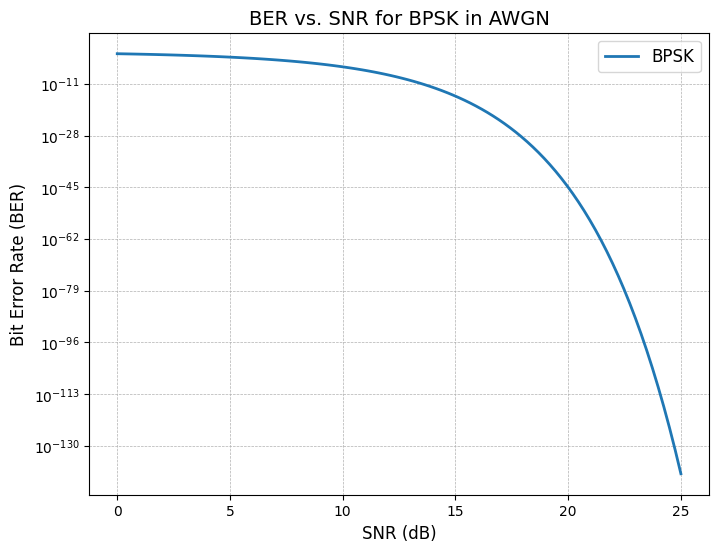

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Function to calculate BER for BPSK
def ber_bpsk(snr_linear):
    return 0.5 * erfc(np.sqrt(snr_linear))

# Generate SNR values in dB
snr_db = np.linspace(0, 25, 100)  # SNR from 0 to 15 dB
snr_linear = 10**(snr_db / 10)    # Convert SNR from dB to linear scale

# Calculate BER for BPSK
ber_values = ber_bpsk(snr_linear)

# Plot BER vs. SNR
plt.figure(figsize=(8, 6))
plt.semilogy(snr_db, ber_values, label='BPSK', linewidth=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('BER vs. SNR for BPSK in AWGN', fontsize=14)
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('Bit Error Rate (BER)', fontsize=12)
plt.legend(fontsize=12)
plt.show()

#### 2. QPSK (Quadrature Phase-Shift Keying):

Same BER performance as BPSK since it uses two orthogonal carriers.

#### 2. 16-QAM (Quadrature Amplitude Modulation):

$ BER \approx \frac{3}{4} Q(\sqrt{\frac{4}{5} \cdot SNR})$

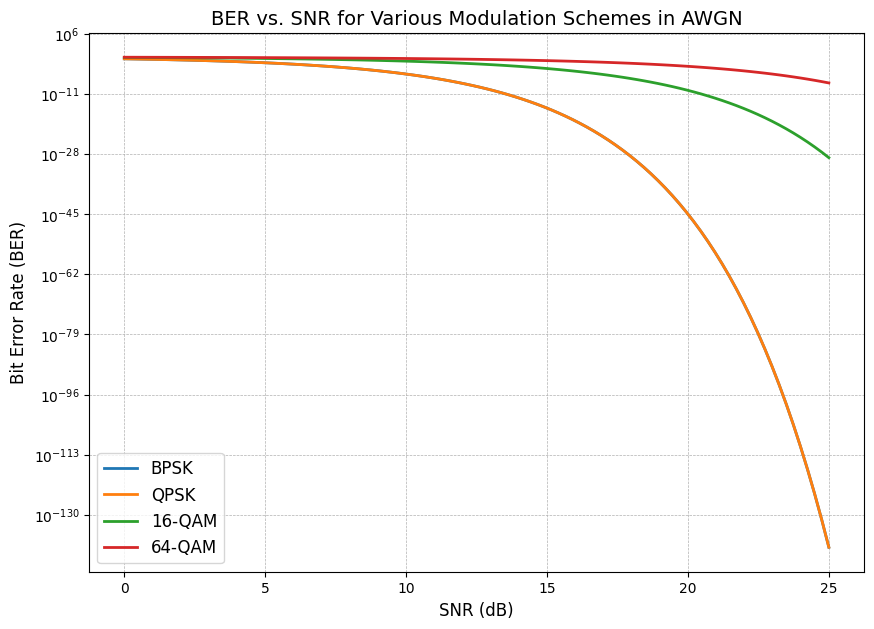

In [9]:
# Functions to calculate BER for different modulation schemes
def ber_qpsk(snr_linear):
    # QPSK has the same BER as BPSK in AWGN
    return ber_bpsk(snr_linear)

def ber_qam(m, snr_linear):
    # Approximate BER for M-QAM
    k = np.log2(m)  # Bits per symbol
    return (4 / k) * (1 - 1 / np.sqrt(m)) * 0.5 * erfc(np.sqrt((3 / (m - 1)) * snr_linear))

# Generate BER for QPSK and higher-order QAM
ber_qpsk_values = ber_qpsk(snr_linear)
ber_16qam_values = ber_qam(16, snr_linear)
ber_64qam_values = ber_qam(64, snr_linear)

# Plot BER for BPSK, QPSK, and higher-order QAM
plt.figure(figsize=(10, 7))
plt.semilogy(snr_db, ber_values, label='BPSK', linewidth=2)
plt.semilogy(snr_db, ber_qpsk_values, label='QPSK', linewidth=2)
plt.semilogy(snr_db, ber_16qam_values, label='16-QAM', linewidth=2)
plt.semilogy(snr_db, ber_64qam_values, label='64-QAM', linewidth=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('BER vs. SNR for Various Modulation Schemes in AWGN', fontsize=14)
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('Bit Error Rate (BER)', fontsize=12)
plt.legend(fontsize=12)
plt.show()


## 3. Energy per Bit, Energy per Symbol 

### 3.1. Energy per Bit 

$E_b$ represents the energy required to transmit a single bit of information.

<div class="alert alert-block alert-success">
It’s an important metric in digital communication systems because it normalizes power over the bit rate, making it independent of the modulation scheme.
</div>

$$E_b = \frac{P_{signal}}{R_b}$$
- $E_b$: Energy per bit
- $R_b$: Bit rate (bits/second)

### 3.2. Energy per Symbol

$E_s$ represents the energy required to transmit a single symbol of information.

A symbol can represent one or more bits, depending on the modulation order.

$$E_s = \frac{P_{signal}}{R_s}$$
- $E_b$: Energy per bit
- $R_b$: Symbol rate (symbols/second)

### 3.3. Eb versus Es

In digital modulation, the number of bits per symbol is $k = \log_2(M)$ where M is the modulation order. 

$E_b$ and $E_s$ are related as: $E_b = \frac{E_s}{k}$

$ R_b = R_s \times k $

Higher-order modulations (M) require more energy per symbol ($E_s$) but allow more bits to be transmitted per symbol, leading to a smaller energy per bit $E_b$ for the same $E_s$.


### 3.4. Practical Implications

* Low-Order Modulations require higher $E_b$ for the same BER due to greater separation between symbols.
* High-Order Modulations require lower $E_b$ for the same symbol energy $E_s$, but their symbols are more densely packed, necessitating higher SNR to maintain the same BER.

You may think that - wait a second - the minimum distance between the symbols in the constellation space has always been the same: $d_{min} =2$. What do you mean by symbols are more densely packed in higher order modulations?

The answer is: the constellation spaces we have been studying have not been normalized by the signal power. Spoiler: when you actually think about it, we don't invent higher order constellations so that we can send signals with higher energy! Instead, we already have a power budget, and these modulations are guidelines on how to map the symbols into the constellation space over a limited average power.

### Relationship of Noise Power to Noise Variance

Noise variance ($\sigma^2$) is the noise power!